In [27]:
# colorop

import numpy as np
import cv2


def color_op():
    src = cv2.imread('./img/butterfly.jpg', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    print('src.shape:', src.shape)
    print('src.dtype:', src.dtype)

    # b, g, r = src[0, 0]
    print('The pixel value [B, G, R] at (0, 0) is', src[0, 0])


def color_inverse():
    src = cv2.imread('./img/butterfly.jpg', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    dst = np.zeros(src.shape, src.dtype)

    for j in range(src.shape[0]):
        for i in range(src.shape[1]):
            p1 = src[j, i]
            p2 = dst[j, i]

            p2[0] = 255 - p1[0]
            p2[1] = 255 - p1[1]
            p2[2] = 255 - p1[2]

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()


def color_grayscale():
    src = cv2.imread('./img/butterfly.jpg', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    cv2.imshow('src', src)
    cv2.imshow('dst', dst)
    cv2.waitKey()
    cv2.destroyAllWindows()


def color_split():
    src = cv2.imread('./img/candies.png', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    # b_plane, g_plane, r_plane = cv2.split(src)
    bgr_planes = cv2.split(src)

    cv2.imshow('src', src)
    cv2.imshow('B_plane', bgr_planes[0])
    cv2.imshow('G_plane', bgr_planes[1])
    cv2.imshow('R_plane', bgr_planes[2])
    cv2.waitKey()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    color_op()
    color_inverse()
    color_grayscale()
    color_split()

src.shape: (356, 493, 3)
src.dtype: uint8
The pixel value [B, G, R] at (0, 0) is [47 88 50]


In [46]:
# coloreq

import sys
import numpy as np
import cv2


src = cv2.imread('./img/pepper.bmp', cv2.IMREAD_COLOR)

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

ycrcb_planes = cv2.split(src_ycrcb)

ycrcb_planes=np.array(ycrcb_planes)

ycrcb_planes[0] = cv2.equalizeHist(ycrcb_planes[0])

dst_ycrcb = cv2.merge(ycrcb_planes)

dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# TypeError: 'tuple' object does not support item assignment

# solution
# ycrcb_planes=np.array(ycrcb_planes)

In [30]:
src = cv2.imread('./img/pepper.bmp', cv2.IMREAD_COLOR)

In [31]:
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

In [32]:
src_ycrcb

array([[[ 30, 179, 111],
        [ 58, 186, 175],
        [ 62, 191, 175],
        ...,
        [ 75, 211, 175],
        [ 81, 216, 182],
        [ 57, 173, 198]],

       [[ 37, 189, 107],
        [119, 179,  87],
        [114, 182,  92],
        ...,
        [174, 114,  78],
        [161, 110,  86],
        [157,  98,  87]],

       [[ 38, 191, 107],
        [121, 174,  88],
        [115, 178,  90],
        ...,
        [171, 109,  83],
        [170, 112,  76],
        [158,  96,  88]],

       ...,

       [[ 28, 174, 112],
        [124, 130,  85],
        [132, 131,  84],
        ...,
        [199, 115, 114],
        [196, 114, 113],
        [187, 129,  95]],

       [[ 28, 174, 112],
        [121, 143,  89],
        [111, 139,  92],
        ...,
        [195, 114, 110],
        [193, 116, 115],
        [169, 147,  99]],

       [[ 28, 174, 112],
        [ 86, 152, 100],
        [127, 137,  89],
        ...,
        [184, 115, 109],
        [192, 113, 122],
        [196, 129, 114]]

In [33]:
src_ycrcb[:,:,(0)]
# 3차원 배열의 이미지 데이터라고 가정
# [:,:] 모든 행과 모든 열을 선택한다
# (0) 3번째 차원에서 첫 번째 채널을 선택

array([[ 30,  58,  62, ...,  75,  81,  57],
       [ 37, 119, 114, ..., 174, 161, 157],
       [ 38, 121, 115, ..., 171, 170, 158],
       ...,
       [ 28, 124, 132, ..., 199, 196, 187],
       [ 28, 121, 111, ..., 195, 193, 169],
       [ 28,  86, 127, ..., 184, 192, 196]], dtype=uint8)

In [34]:
ycrcb_planes = cv2.split(src_ycrcb)

In [35]:
ycrcb_planes

(array([[ 30,  58,  62, ...,  75,  81,  57],
        [ 37, 119, 114, ..., 174, 161, 157],
        [ 38, 121, 115, ..., 171, 170, 158],
        ...,
        [ 28, 124, 132, ..., 199, 196, 187],
        [ 28, 121, 111, ..., 195, 193, 169],
        [ 28,  86, 127, ..., 184, 192, 196]], dtype=uint8),
 array([[179, 186, 191, ..., 211, 216, 173],
        [189, 179, 182, ..., 114, 110,  98],
        [191, 174, 178, ..., 109, 112,  96],
        ...,
        [174, 130, 131, ..., 115, 114, 129],
        [174, 143, 139, ..., 114, 116, 147],
        [174, 152, 137, ..., 115, 113, 129]], dtype=uint8),
 array([[111, 175, 175, ..., 175, 182, 198],
        [107,  87,  92, ...,  78,  86,  87],
        [107,  88,  90, ...,  83,  76,  88],
        ...,
        [112,  85,  84, ..., 114, 113,  95],
        [112,  89,  92, ..., 110, 115,  99],
        [112, 100,  89, ..., 109, 122, 114]], dtype=uint8))

In [36]:
src_ycrcb[:,:,(0)]
# 3차원 배열의 이미지 데이터라고 가정
# [:,:] 모든 행과 모든 열을 선택한다
# (0) 3번째 차원에서 첫 번째 채널을 선택

array([[ 30,  58,  62, ...,  75,  81,  57],
       [ 37, 119, 114, ..., 174, 161, 157],
       [ 38, 121, 115, ..., 171, 170, 158],
       ...,
       [ 28, 124, 132, ..., 199, 196, 187],
       [ 28, 121, 111, ..., 195, 193, 169],
       [ 28,  86, 127, ..., 184, 192, 196]], dtype=uint8)

In [37]:
type(ycrcb_planes)
# 여기서 오류가 발생. 튜플이라서

tuple

In [38]:
ycrcb_planes=np.array(ycrcb_planes)

In [39]:
type(ycrcb_planes)

numpy.ndarray

In [40]:
type(ycrcb_planes[0])

numpy.ndarray

In [41]:
cv2.equalizeHist(ycrcb_planes[0])

array([[ 20,  36,  39, ...,  51,  60,  35],
       [ 23, 126, 121, ..., 205, 183, 176],
       [ 23, 128, 122, ..., 200, 199, 178],
       ...,
       [ 18, 131, 139, ..., 244, 242, 227],
       [ 18, 128, 118, ..., 241, 238, 197],
       [ 18,  69, 134, ..., 221, 237, 242]], dtype=uint8)

In [42]:
ycrcb_planes[0] = cv2.equalizeHist(ycrcb_planes[0])

In [45]:
dst_ycrcb = cv2.merge(ycrcb_planes)
dst = cv2.cvtColor(dst_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# tuple error solution

# 만약 **첫 번째 채널(단일 인덱스)**만을 참조하려는 것이라면,
# (0) 대신 0을 사용해야 합니다.
# # 올바른 예시
# y_channel = src_ycrcb[:, :, 0]  # 첫 번째 채널만 선택

In [7]:
# inrange

import numpy as np
import cv2


def on_hue_changed(_=None):
    lower_hue = cv2.getTrackbarPos('Lower Hue', 'mask')
    upper_hue = cv2.getTrackbarPos('Upper Hue', 'mask')
    # 트랙 바는 일정 범위 내의 값을 변경할 때 사용하며,
    # 적절한 임곗값을 찾거나 변경하기 위해 사용합니다.

    lowerb = (lower_hue, 100, 0)
    upperb = (upper_hue, 255, 255)
    mask = cv2.inRange(src_hsv, lowerb, upperb)

    cv2.imshow('mask', mask)


def main():
    global src_hsv

    src = cv2.imread('./img/candies.png', cv2.IMREAD_COLOR)

    if src is None:
        print('Image load failed!')
        return

    src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

    cv2.imshow('src', src)

    cv2.namedWindow('mask')
    cv2.createTrackbar('Lower Hue', 'mask', 40, 179, on_hue_changed)
    cv2.createTrackbar('Upper Hue', 'mask', 80, 179, on_hue_changed)
    on_hue_changed(0)

    cv2.waitKey()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    main()

# 트랙바를 통해 조절하면서 특정 색상만을 확인

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:868: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


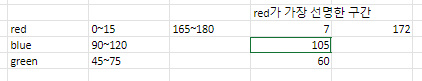

In [6]:
# backproj

import numpy as np
import cv2

# Calculate CrCb histogram from a reference image

ref = cv2.imread('./img/ref.png', cv2.IMREAD_COLOR)
mask = cv2.imread('./img/mask.bmp', cv2.IMREAD_GRAYSCALE)
ref_ycrcb = cv2.cvtColor(ref, cv2.COLOR_BGR2YCrCb)

channels = [1, 2]
cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

hist = cv2.calcHist([ref_ycrcb], channels, mask, histSize, ranges)

# Apply histogram backprojection to an input image

src = cv2.imread('./img/kids.png', cv2.IMREAD_COLOR)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)

cv2.imshow('src', src)
cv2.imshow('backproj', backproj)
cv2.waitKey()
cv2.destroyAllWindows()